## Prepare NIR from MODIS Data

In this notebook, 8-daily MODIS/Terra NIR data from 2000 - 2024 is processed. The NIR data will be used later on to calculate the GPP. The following steps are included:
- Replace fill value with NA
- Mask pixels based on quality flags
- Crop to forest area
- Save datasets for needleleaved and broadleaved forests
- Save information on quality flags and counts of high quality pixels per year as csv datasets

In [1]:
# import libraries
import os
import warnings
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [4]:
# read MODIS NIR data
nir_full = xr.open_dataset("./Raw/NIR_MODIS/MOD09A1.061_500m_aid0001.nc", decode_coords="all", decode_times=True)

In [5]:
# note that all dates from 2000-2024 are stored in one large netCDF dataset
nir_full

<xarray.Dataset> Size: 113GB
Dimensions:              (time: 1142, lat: 1871, lon: 2203)
Coordinates:
    crs                  int8 1B ...
  * time                 (time) object 9kB 2000-02-18 00:00:00 ... 2024-12-26...
  * lat                  (lat) float64 15kB 55.06 55.06 55.05 ... 47.27 47.27
  * lon                  (lon) float64 18kB 5.865 5.869 5.873 ... 15.04 15.04
Data variables:
    sur_refl_b02         (time, lat, lon) float64 38GB ...
    sur_refl_qc_500m     (time, lat, lon) float64 38GB ...
    sur_refl_state_500m  (time, lat, lon) float64 38GB ...
Attributes:
    title:        MOD09A1.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.81.1
    references:   See README.md
    history:      See README.md

In [6]:
# convert CFTime index to datetime index
datetimeindex = nir_full.indexes['time'].to_datetimeindex()
nir_full['time'] = datetimeindex

C:\Users\irish\AppData\Local\Temp\ipykernel_1660\339378266.py:2: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  datetimeindex = nir_full.indexes['time'].to_datetimeindex()


In [7]:
# rename variables
nir_full = nir_full.rename({"sur_refl_b02":"NIR", "sur_refl_qc_500m":"QA", "sur_refl_state_500m":"QA_state"})

In [8]:
# check crs
nir_full.rio.crs

CRS.from_wkt('GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

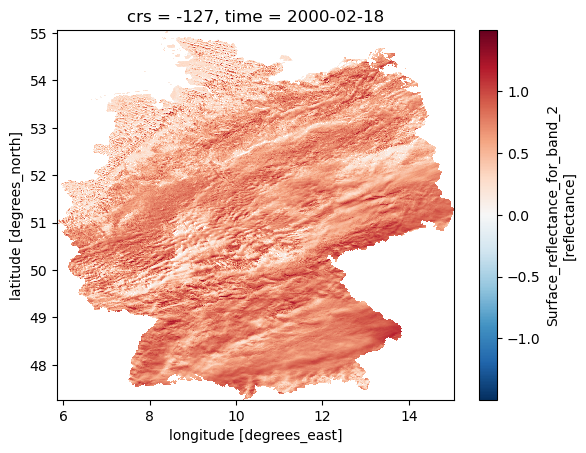

In [9]:
# plot exemplary NIR and Quality Flag data of one date to get a first impression
nir_full.NIR.sel(time = "2000-02-18").plot()

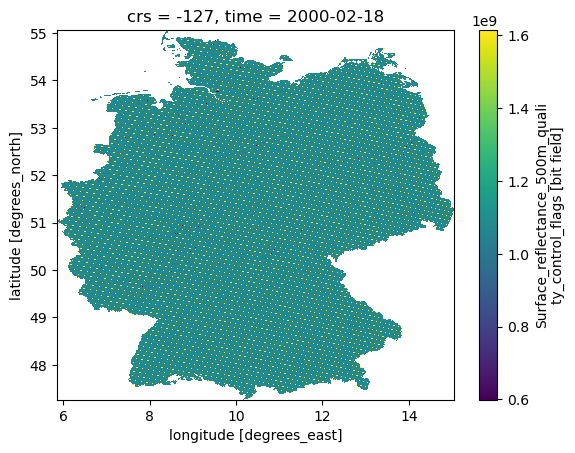

In [10]:
nir_full.QA.sel(time = "2000-02-18").plot()

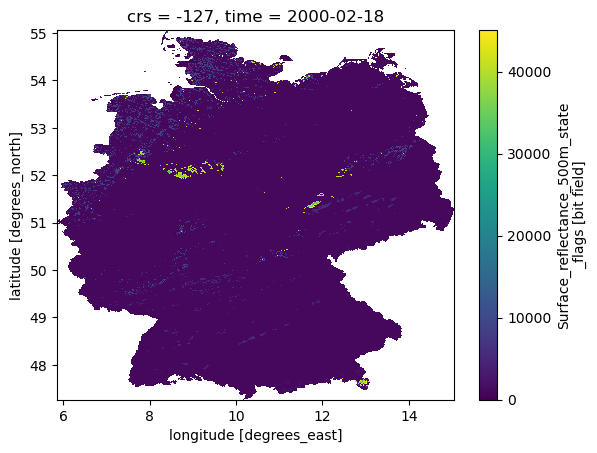

In [11]:
nir_full.QA_state.sel(time = "2000-02-18").plot()

In [12]:
# read in quality flag lookup table that was delivered with data to get information on quality flags
lut = pd.read_csv("./Raw/NIR_MODIS/MOD09A1-061-sur-refl-qc-500m-lookup.csv")
lut

,Value,MODLAND,band 1 data quality four bit range,band 2 data quality four bit range,band 3 data quality four bit range,band 4 data quality four bit range,band 5 data quality four bit range,band 6 data quality four bit range,band 7 data quality four bit range,atmospheric correction performed,adjacency correction performed
0,599505851,Corrected product not produced due to other re...,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,dead detector; data interpolated in L1B,no,no
1,976993211,Corrected product not produced due to other re...,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,dead detector; data interpolated in L1B,L1B data faulty,no,no
2,1000324027,Corrected product not produced due to other re...,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,NaN,L1B data faulty,L1B data faulty,no,no
3,1000586171,Corrected product not produced due to other re...,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,dead detector; data interpolated in L1B,L1B data faulty,L1B data faulty,no,no
4,1002159035,Corrected product not produced due to other re...,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,L1B data faulty,no,no
...,...,...,...,...,...,...,...,...,...,...,...
414,2075394103,Corrected product not produced due to other re...,correction out of bounds pixel constrained to ...,highest quality,highest quality,highest quality,correction out of bounds pixel constrained to ...,L1B data faulty,L1B data faulty,yes,no
415,2075394883,Corrected product not produced due to other re...,highest quality,correction out of bounds pixel constrained to ...,highest quality,highest quality,correction out of bounds pixel constrained to ...,L1B data faulty,L1B data faulty,yes,no
416,2075394935,Corrected product not produced due to other re...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,highest quality,highest quality,correction out of bounds pixel constrained to ...,L1B data faulty,L1B data faulty,yes,no
417,2075656195,Corrected product not produced due to other re...,highest quality,highest quality,highest quality,highest quality,L1B data faulty,L1B data faulty,L1B data faulty,yes,no


In [13]:
# extract all quality flag values that are fit for our purpose and should be kept in the dataset
# information on flag values: https://lpdaac.usgs.gov/documents/925/MOD09_User_Guide_V61.pdf

# include good quality based on MODLAND
modland = ['Corrected product produced at ideal quality -- all bands', 'Corrected product produced at less than ideal quality -- some or all bands']
lut = lut[lut['MODLAND'].isin(modland)]

# exclude low quality for band 2 (other bands are not of interest)
qb2 = ["missing input", "correction out of bounds, pixel constrained to extreme allowable value", "L1B data faulty", "not processed due to deep ocean or clouds"]
lut = lut[~lut['band 2 data quality four bit range'].isin(qb2)]

# include where atmospheric correction was performed
lut = lut[lut['atmospheric correction performed'] == 'yes' ]

# look at updated table
lut

,Value,MODLAND,band 1 data quality four bit range,band 2 data quality four bit range,band 3 data quality four bit range,band 4 data quality four bit range,band 5 data quality four bit range,band 6 data quality four bit range,band 7 data quality four bit range,atmospheric correction performed,adjacency correction performed
5,1073741824,Corrected product produced at ideal quality --...,highest quality,highest quality,highest quality,highest quality,highest quality,highest quality,highest quality,yes,no
6,1073741877,Corrected product produced at less than ideal ...,correction out of bounds pixel constrained to ...,highest quality,highest quality,highest quality,highest quality,highest quality,highest quality,yes,no
7,1073742657,Corrected product produced at less than ideal ...,highest quality,correction out of bounds pixel constrained to ...,highest quality,highest quality,highest quality,highest quality,highest quality,yes,no
8,1073742709,Corrected product produced at less than ideal ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,highest quality,highest quality,highest quality,highest quality,highest quality,yes,no
10,1073755137,Corrected product produced at less than ideal ...,highest quality,highest quality,correction out of bounds pixel constrained to ...,highest quality,highest quality,highest quality,highest quality,yes,no
...,...,...,...,...,...,...,...,...,...,...,...
306,2004091765,Corrected product produced at less than ideal ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,highest quality,highest quality,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,yes,no
307,2004303873,Corrected product produced at less than ideal ...,highest quality,highest quality,highest quality,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,yes,no
308,2004303925,Corrected product produced at less than ideal ...,correction out of bounds pixel constrained to ...,highest quality,highest quality,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,yes,no
309,2004304757,Corrected product produced at less than ideal ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,highest quality,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,correction out of bounds pixel constrained to ...,yes,no


In [14]:
# extract quality flags that indicate good pixel quality
qa_tokeep1 = list(lut["Value"])

In [15]:
# get all dates that are stored in large dataset
dates = list(nir_full.time.values)

In [16]:
# loop over dates to process each date seperately
# dataset is too large to be processed at once

for d in dates:
    
    # extract data of this date as xarray
    nir = nir_full.sel(time = d)

    # manually get time back as dimension, not just variable
    # time dimension was dropped when selecting
    nir = nir.expand_dims('time')

    # replace fill value with NA
    # valid nir range is -100 to 16000, fill value is -28672, according to https://lpdaac.usgs.gov/products/mod09a1v061/
    # but the scale factor of 0.0001 is automatically applied to the data, so we convert values smaller than -28.671 to NA
    nir['NIR'] = xr.where((nir['NIR'] > -28.672), nir['NIR'], np.nan)

    # create masks for the NIR dataset that only keep pixels of good quality
    # use QA and QA_state to determine quality
    # start with flags that were determined from lookup table
    mask1 = nir["QA"].isin(qa_tokeep1).compute()

    # now create mask for QA_state
    # extract quality flag pixel values as dataframe
    df_qa_pixelvalues = nir.QA_state.to_dataframe()

    # count frequency of pixel values and extract to dataframe
    df_qa_freq = df_qa_pixelvalues["QA_state"].value_counts().to_frame()

    # create new column with quality flag
    df_qa_freq["qa_flag"] = df_qa_freq.index

    # reset index
    df_qa_freq.reset_index(drop = True, inplace = True)

    # rename column with counts
    df_qa_freq.rename({'count':'qa_flag_freq'},axis=1, inplace= True)

    # convert values to integer
    df_qa_freq["qa_flag"] = df_qa_freq["qa_flag"].astype("int16")

    # convert quality flags to binary to assess quality information stored in bits
    # define function to convert decimal numbers to signed 16bit
    def to_signed_16bit(n):
        # make sure value is an integer
        n = int(n)
        if n < 0:
        # apply 2's complement for negative numbers
            n = (1 << 16) + n
        # convert to 16-bit binary string
        return f'{n:016b}'
            
    # apply function to quality flag column 
    df_qa_freq["binary"] = df_qa_freq["qa_flag"].apply(to_signed_16bit)

    # create new columns with the different quality information stored in the bits to assess them seperately
    # source: https://lpdaac.usgs.gov/documents/925/MOD09_User_Guide_V61.pdf
    df_qa_freq['cloud state'] = df_qa_freq['binary'].astype(str).str[14:16]
    df_qa_freq['cloud shadow'] = df_qa_freq['binary'].astype(str).str[13]
    df_qa_freq['land/water flag'] = df_qa_freq['binary'].astype(str).str[10:13]
    df_qa_freq['aerosol quantity'] = df_qa_freq['binary'].astype(str).str[8:10]
    df_qa_freq['cirrus detected'] = df_qa_freq['binary'].astype(str).str[6:8]
    df_qa_freq['internal cloud algorithm flag'] = df_qa_freq['binary'].astype(str).str[5]
    df_qa_freq['internal fire algorithm flag'] = df_qa_freq['binary'].astype(str).str[4]
    df_qa_freq['MOD35 snow/ice flag'] = df_qa_freq['binary'].astype(str).str[3]
    df_qa_freq['pixel adjacent to cloud'] = df_qa_freq['binary'].astype(str).str[2]
    df_qa_freq['salt pan'] = df_qa_freq['binary'].astype(str).str[1]
    df_qa_freq['internal snow mask'] = df_qa_freq['binary'].astype(str).str[0]

    # extract all quality flag values that are fit for our purpose and should be kept in the dataset
    df_qa_tokeep2 = df_qa_freq[(df_qa_freq['cloud state']=="00") & 
                                (df_qa_freq["cloud shadow"]=="0") &
                                (df_qa_freq["aerosol quantity"].isin(["01", "10"])) &
                                (df_qa_freq["cirrus detected"].isin(["00", "01"])) &
                                (df_qa_freq["internal cloud algorithm flag"]=="0") &
                                (df_qa_freq["pixel adjacent to cloud"]=="0")]

    qa_tokeep2 = df_qa_tokeep2["qa_flag"]

    # create a mask for the datasets that only keeps pixels of good quality
    mask2 = nir["QA_state"].isin(qa_tokeep2).compute()

    # mask dataset
    nir_masked1 = nir["NIR"].where(mask1, drop = False)
    nir_masked = nir_masked1.where(mask2, drop = False)

    # load forest area from ESA Landcover data for corresponding year
    # attention: forest data only available for 1992 - 2022 -> choose 2022 for nir data of 2022 - 2024
    year = int(str(d)[0:4])

    if year >= 2022:
        forest_year = 2022
    else: forest_year = year

    forest = xr.open_dataset(f"./Forest_GER/Forest_GER_{forest_year}.nc", 
                            decode_coords = "all", 
                            decode_times= True)
    
     # set crs for data
    nir_masked.rio.write_crs(4326, inplace = True)

    # set spatial dims again - otherwise resampling raises an error
    nir_masked.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace = True)

    # resample dataset to match resolution of forest dataset
    nir_match = nir_masked.rio.reproject_match(forest)

    # rename dimensions - they got renamed while resampling
    nir_match = nir_match.rename({'y':'lat', 'x':'lon'})

    # mask nir with forest data
    # broadleaved forest:
    nir_BL = nir_match.where(forest.lccs_class.sel(time=f"{forest_year}-01-01") == 60, 
                                drop = False)

    # needleleaved forest:
    NL_mask = forest.lccs_class.sel(time=f"{forest_year}-01-01").isin([70, 80]).compute()
    nir_NL = nir_match.where(NL_mask, drop = False)

    # compress data to reduce size
    comp = dict(zlib=True, complevel=4)
    nir_BL.encoding.update(comp)
    nir_NL.encoding.update(comp)

    # save as netCDF4 datasets
    date = nir_match.coords["time"].dt.strftime('%Y-%m-%d').values[0]
    nir_BL.to_netcdf(f"./NIR/8Daily/{year}/NIR_{date}_BL.nc")
    nir_NL.to_netcdf(f"./NIR/8Daily/{year}/NIR_{date}_NL.nc")

In [17]:
# load one processed dataset as example and plot to get an overview
nir_NL = xr.open_dataarray("./NIR/8Daily/2000/NIR_2000-04-06_NL.nc", decode_coords = "all", decode_times= True)
nir_NL

<xarray.DataArray 'NIR' (time: 1, lat: 2952, lon: 3510)> Size: 83MB
[10361520 values with dtype=float64]
Coordinates:
    crs          int8 1B ...
  * time         (time) datetime64[ns] 8B 2000-04-06
    spatial_ref  int64 8B ...
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0

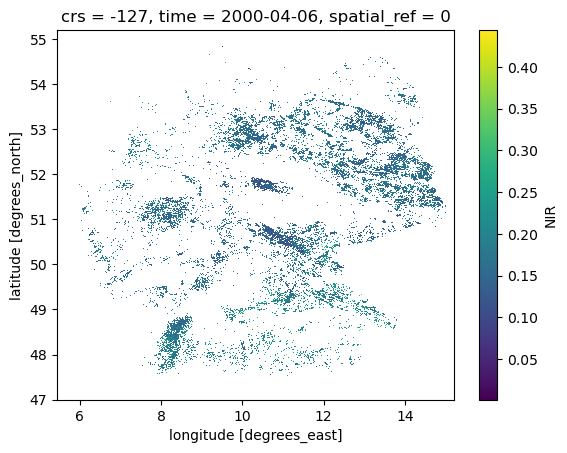

In [18]:
nir_NL.plot()

In [19]:
# to get more information on pixel quality:
# count quality flag frequencies and pixels of high quality per year
# read in again quality flag lookup table that was delivered with data
lut = pd.read_csv("./Raw/NIR_MODIS/MOD09A1-061-sur-refl-qc-500m-lookup.csv")

In [20]:
# rename column with quality flags
lut.rename({"Value":'qa_flag'},axis=1, inplace= True)

In [21]:
# read in table with quality flag statistics that was also delivered with data
qa_stats = pd.read_csv("./Raw/NIR_MODIS/MOD09A1-061-sur-refl-qc-500m-Statistics-QA.csv")

In [22]:
qa_stats

,File,aid,Date,599505851,976993211,1000324027,1000586171,1002159035,1073741824,1073741877,...,2071987063,2074083331,2074084163,2074084215,2075394051,2075394103,2075394883,2075394935,2075656195,2075656247
0,sur_refl_qc_500m_2000049_aid0001,aid0001,2000-02-18,1101.0,1603.0,882.0,801.0,15918.0,1949647,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sur_refl_qc_500m_2000057_aid0001,aid0001,2000-02-26,NaN,NaN,NaN,NaN,NaN,1983146,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sur_refl_qc_500m_2000065_aid0001,aid0001,2000-03-05,NaN,NaN,NaN,NaN,NaN,2005882,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sur_refl_qc_500m_2000073_aid0001,aid0001,2000-03-13,NaN,NaN,NaN,NaN,NaN,2024188,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sur_refl_qc_500m_2000081_aid0001,aid0001,2000-03-21,NaN,NaN,NaN,NaN,NaN,1996842,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,sur_refl_qc_500m_2024329_aid0001,aid0001,2024-11-24,NaN,NaN,NaN,NaN,NaN,2303966,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,sur_refl_qc_500m_2024337_aid0001,aid0001,2024-12-02,NaN,NaN,NaN,NaN,NaN,2318493,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,sur_refl_qc_500m_2024345_aid0001,aid0001,2024-12-10,NaN,NaN,NaN,NaN,NaN,2296433,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,sur_refl_qc_500m_2024353_aid0001,aid0001,2024-12-18,NaN,NaN,NaN,NaN,NaN,2312529,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# drop unneeded columns
qa_stats = qa_stats.drop(["File", "aid"], axis=1)

# extract year as new column
qa_stats["Year"] = qa_stats['Date'].astype(str).str[0:4]

In [24]:
# create empty lists for pixel counts
years = []
pixel_counts = []
high_quality_pixel_counts = []

In [25]:
# loop over each year to get yearly statistics 
for year in range(2000, 2025):

    # get all dates from this year and extract them
    qa_stats_yearly = qa_stats[(qa_stats["Year"] == str(year))]

    # drop unneeded columns
    qa_stats_yearly = qa_stats_yearly.drop(["Date", "Year"], axis=1)

    # calculate sum of flag counts of dates in each year to get flag frequencies for this year
    df_qa_freq = pd.DataFrame(qa_stats_yearly.sum())

    # create new column with quality flag
    df_qa_freq["qa_flag"] = df_qa_freq.index

    # reset index
    df_qa_freq.reset_index(drop = True, inplace = True)

    # rename column with counts
    df_qa_freq.rename({0:'qa_flag_freq'},axis=1, inplace= True)

    # convert values to integer
    df_qa_freq = df_qa_freq.astype(int)

    # add information from lookup table to flags
    df_qa_freq = pd.merge(df_qa_freq, lut, on = "qa_flag")

    # save quality flag frequencies as csv
    df_qa_freq.to_csv(f"./Tables/NIR_Quality_Assessment/NIR_QA_Flag_Frequency_{year}.csv")

    # extract all quality flag values that are fit for our purpose and should be kept in the dataset
    df_qa_tokeep = df_qa_freq[(df_qa_freq["qa_flag"].isin(qa_tokeep1))]

    # append counts to lists    
    years.append(year)
    pixel_counts.append(sum(df_qa_freq.qa_flag_freq))
    high_quality_pixel_counts.append(sum(df_qa_tokeep.qa_flag_freq))

In [26]:
df_qa_pixel_counts = pd.DataFrame({"Year": years,
                                "Pixels": pixel_counts,
                                "High_Quality_Pixels": high_quality_pixel_counts})

In [27]:
df_qa_pixel_counts

,Year,Pixels,High_Quality_Pixels
0,2000,106189973,106093383
1,2001,119454159,119404108
2,2002,122129586,122103435
3,2003,122129560,122107758
4,2004,122129586,122104810
5,2005,122129586,122098054
6,2006,122129586,122102892
7,2007,122129586,122098261
8,2008,122129586,122100959
9,2009,122129586,122101404


In [28]:
# save pixel counts as csv
df_qa_pixel_counts.to_csv("./Tables/NIR_Quality_Assessment/NIR_QA_Pixel_Counts_2000-2024.csv")

In [29]:
# now do the same for the QA state flags
# count quality flag frequencies and pixels of high quality per year
years = []
pixel_counts = []
high_quality_pixel_counts = []

In [30]:
# get all dates that are stored in large dataset
dates = list(nir_full.time.values)

In [31]:
# loop over dates to get pixel counts
for d in dates:
    
    # extract data of this date as xarray
    nir = nir_full.sel(time = d)

    # manually get time back as dimension, not just variable
    # time dimension was dropped when selecting
    nir = nir.expand_dims('time')

    # extract quality flag pixel values as dataframe
    df_qa_pixelvalues = nir.QA_state.to_dataframe()

    # count frequency of pixel values and extract to dataframe
    df_qa_freq = df_qa_pixelvalues["QA_state"].value_counts().to_frame()

    # create new column with quality flag
    df_qa_freq["qa_flag"] = df_qa_freq.index

    # reset index
    df_qa_freq.reset_index(drop = True, inplace = True)

    # rename column with counts
    df_qa_freq.rename({'count':'qa_flag_freq'},axis=1, inplace= True)

    # convert values to integer
    df_qa_freq["qa_flag"] = df_qa_freq["qa_flag"].astype("int16")

    # convert quality flags to binary to assess quality information stored in bits
    # define function to convert decimal numbers to signed 16bit
    def to_signed_16bit(n):
        # make sure value is an integer
        n = int(n)
        if n < 0:
        # apply 2's complement for negative numbers
            n = (1 << 16) + n
        # convert to 16-bit binary string
        return f'{n:016b}'
        
    # apply function to quality flag column 
    df_qa_freq["binary"] = df_qa_freq["qa_flag"].apply(to_signed_16bit)

    # create new columns with the different quality information stored in the bits to assess them seperately
    # source: https://lpdaac.usgs.gov/documents/925/MOD09_User_Guide_V61.pdf
    df_qa_freq['cloud state'] = df_qa_freq['binary'].astype(str).str[14:16]
    df_qa_freq['cloud shadow'] = df_qa_freq['binary'].astype(str).str[13]
    df_qa_freq['land/water flag'] = df_qa_freq['binary'].astype(str).str[10:13]
    df_qa_freq['aerosol quantity'] = df_qa_freq['binary'].astype(str).str[8:10]
    df_qa_freq['cirrus detected'] = df_qa_freq['binary'].astype(str).str[6:8]
    df_qa_freq['internal cloud algorithm flag'] = df_qa_freq['binary'].astype(str).str[5]
    df_qa_freq['internal fire algorithm flag'] = df_qa_freq['binary'].astype(str).str[4]
    df_qa_freq['MOD35 snow/ice flag'] = df_qa_freq['binary'].astype(str).str[3]
    df_qa_freq['pixel adjacent to cloud'] = df_qa_freq['binary'].astype(str).str[2]
    df_qa_freq['salt pan'] = df_qa_freq['binary'].astype(str).str[1]
    df_qa_freq['internal snow mask'] = df_qa_freq['binary'].astype(str).str[0]

    # save quality flag frequencies as csv
    df_qa_freq.to_csv(f"./Tables/NIR_Quality_Assessment/NIR_QA_State_Flag_Frequency_{year}.csv")

    # extract all quality flag values that are fit for our purpose and should be kept in the dataset
    df_qa_tokeep2 = df_qa_freq[(df_qa_freq['cloud state']=="00") & 
                                (df_qa_freq["cloud shadow"]=="0") &
                                (df_qa_freq["aerosol quantity"].isin(["01", "10"])) &
                                (df_qa_freq["cirrus detected"].isin(["00", "01"])) &
                                (df_qa_freq["internal cloud algorithm flag"]=="0") &
                                (df_qa_freq["pixel adjacent to cloud"]=="0")]
    
    # append counts to lists    
    years.append(year)
    pixel_counts.append(sum(df_qa_freq.qa_flag_freq))
    high_quality_pixel_counts.append(sum(df_qa_tokeep2.qa_flag_freq))

In [32]:
df_qa_pixel_counts = pd.DataFrame({"Year": years,
                                "Pixels": pixel_counts,
                                "High_Quality_Pixels": high_quality_pixel_counts})

In [33]:
df_qa_pixel_counts

,Year,Pixels,High_Quality_Pixels
0,2024,2654990,13814
1,2024,2654991,1792004
2,2024,2654991,675286
3,2024,2654991,1095755
4,2024,2654991,1763464
...,...,...,...
1137,2024,2654991,787540
1138,2024,2654991,33867
1139,2024,2654991,39023
1140,2024,2654991,20861


In [34]:
# save pixel counts as csv
df_qa_pixel_counts.to_csv("./Tables/NIR_Quality_Assessment/NIR_QA_State_Pixel_Counts_2000-2024.csv")